# PyEarthScience:  Python examples for Earth Scientists

## contour plots

### Using PyNGL

#### Contour plot with
    - filled contour areas
    - without contour line labels
    - labelbar
    - title


In [6]:
import Ngl,Nio

#-- define variables
fname  = "/Users/k204045/NCL/general/data/new_data/rectilinear_grid_2D.nc" #-- data file name

#-- open file and read variables
f      =  Nio.open_file(fname,"r")             #-- open data file
temp   =  f.variables["tsurf"][0,::-1,:]       #-- first time step, reverse latitude
lat    =  f.variables["lat"][::-1]             #-- reverse latitudes
lon    =  f.variables["lon"][:]                #-- all longitudes

Add cyclic data. Set minimum and maximum contour values although the interval.

In [7]:
tempac =  Ngl.add_cyclic(temp[:,:])

minval =  250.                                 #-- minimum contour level
maxval =  315                                  #-- maximum contour level
inc    =    5.                                 #-- contour level spacing
ncn    = (maxval-minval)/inc + 1               #-- number of contour levels.

Open a workstation, here x11 window.

In [8]:
wkres                  =  Ngl.Resources()      #-- generate an res object for workstation
wkres.wkColorMap       = "rainbow"             #-- choose colormap
wks_type               = "png"                 #-- graphics output type
wks                    =  Ngl.open_wks(wks_type,"plot_contour_PyNGL",wkres)  #-- open workstation

Set resources.

In [9]:
res                    =  Ngl.Resources()      #-- generate an resource object for plot

if hasattr(f.variables["tsurf"],"long_name"):
   res.tiMainString = f.variables["tsurf"].long_name  #-- set main title

res.vpXF                  =  0.1               #-- start x-position of viewport
res.vpYF                  =  0.9               #-- start y-position of viewport
res.vpWidthF              =  0.7               #-- width of viewport
res.vpHeightF             =  0.7               #-- height of viewport

res.cnFillOn              =  True              #-- turn on contour fill.
res.cnLinesOn             =  False             #-- turn off contour lines
res.cnLineLabelsOn        =  False             #-- turn off line labels.
res.cnInfoLabelOn         =  False             #-- turn off info label.
res.cnLevelSelectionMode  = "ManualLevels"     #-- select manual level selection mode
res.cnMinLevelValF        =  minval            #-- minimum contour value
res.cnMaxLevelValF        =  maxval            #-- maximum contour value
res.cnLevelSpacingF       =  inc               #-- contour increment

res.mpGridSpacingF        =  30.                #-- map grid spacing

res.sfXCStartV            =  float(min(lon))   #-- x-axis location of 1st element lon
res.sfXCEndV              =  float(max(lon))   #-- x-axis location of last element lon
res.sfYCStartV            =  float(min(lat))   #-- y-axis location of 1st element lat
res.sfYCEndV              =  float(max(lat))   #-- y-axis location of last element lat

res.pmLabelBarDisplayMode = "Always"           #-- turn on the label bar.
res.lbOrientation         = "Horizontal"       #-- labelbar orientation



Draw the plot.

In [10]:
map = Ngl.contour_map(wks,tempac,res)          #-- draw contours over a map.

#-- end
Ngl.delete_wks(wks)                            #-- this need to be done to close the graphics output file
Ngl.end()

Show the plot in this notebook.

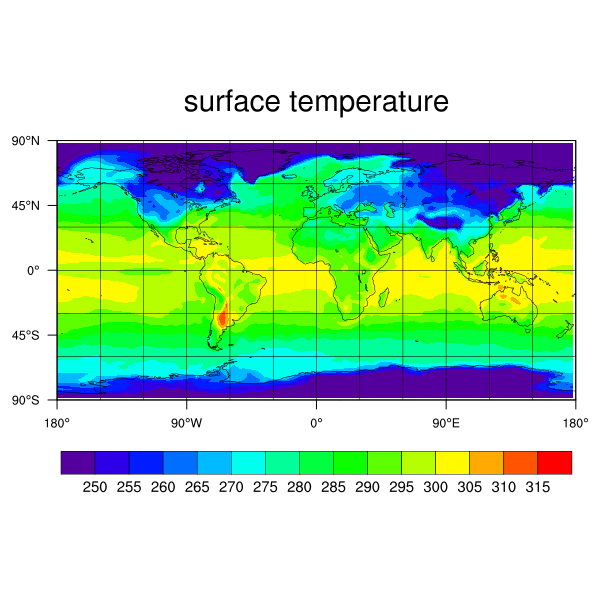

In [11]:
from IPython.display import Image
Image(filename='plot_contour_PyNGL.png') 